# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [ ]:
train_data = pd.read_csv('train_airlines_passenger_satisfaction.csv')
test_data = pd.read_csv('test_airlines_passenger_satisfaction.csv')

In [ ]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
print('The train data consist of {} rows and {} columns'.format(train_data.shape[0], train_data.shape[1]))
print('The test data consist of {} rows and {} columns'.format(test_data.shape[0], test_data.shape[1]))

The train data consist of 103904 rows and 25 columns
The test data consist of 25976 rows and 25 columns


# Data Understanding and Data Cleaning

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
print(train_data['id'].nunique())
print(train_data['Unnamed: 0'].nunique())

103904
103904


- There are missing data on *Arrival Delay in Minutes* column.
- Unnamed: 0 and *id* column will be dropped since they are unique

In [ ]:
#drop columns
train_data = train_data.drop(['Unnamed: 0', 'id'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'id'], axis=1)

In [ ]:
#changing column names 
train_data = train_data.rename({'satisfaction' : 'Satisfaction'}, axis=1)
test_data = test_data.rename({'satisfaction' : 'Satisfaction'}, axis=1)

In [ ]:
#check duplicated values
train_data.duplicated().sum()

0

In [ ]:
#check if there is a null data
train_data.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Satisfaction                           0
dtype: int64

In [ ]:
test_data.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             83
Gender                                0
Seat comfort                          0
Departure Delay in Minutes            0
Cleanliness                           0
Inflight service                      0
Checkin service                       0
Baggage handling                      0
Leg room service                      0
On-board service                      0
Inflight entertainment                0
Online boarding                       0
Customer Type                         0
Food and drink                        0
Gate location                         0
Ease of Online booking                0
Departure/Arrival time convenient     0
Inflight wifi service                 0
Flight Distance                       0
Class                                 0
Type of Travel                        0
Age                                   0
Satisfaction                          0
dtype: int64

Fill missing values on train and test data using train data median

In [ ]:
#handling missing values
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median())
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median())

In [ ]:
#re-check
train_data.isna().sum().sort_values(ascending=False)

Gender                               0
Seat comfort                         0
Arrival Delay in Minutes             0
Departure Delay in Minutes           0
Cleanliness                          0
Inflight service                     0
Checkin service                      0
Baggage handling                     0
Leg room service                     0
On-board service                     0
Inflight entertainment               0
Online boarding                      0
Customer Type                        0
Food and drink                       0
Gate location                        0
Ease of Online booking               0
Departure/Arrival time convenient    0
Inflight wifi service                0
Flight Distance                      0
Class                                0
Type of Travel                       0
Age                                  0
Satisfaction                         0
dtype: int64

# Exploratory Data Analysis

In [ ]:
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
                    'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                    'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
                    'Inflight service', 'Cleanliness', 'Satisfaction']

numerical_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

#create dataframe
df_categorical = train_data[categorical_feature]
df_numerical = train_data[numerical_feature]

## Categorical Data

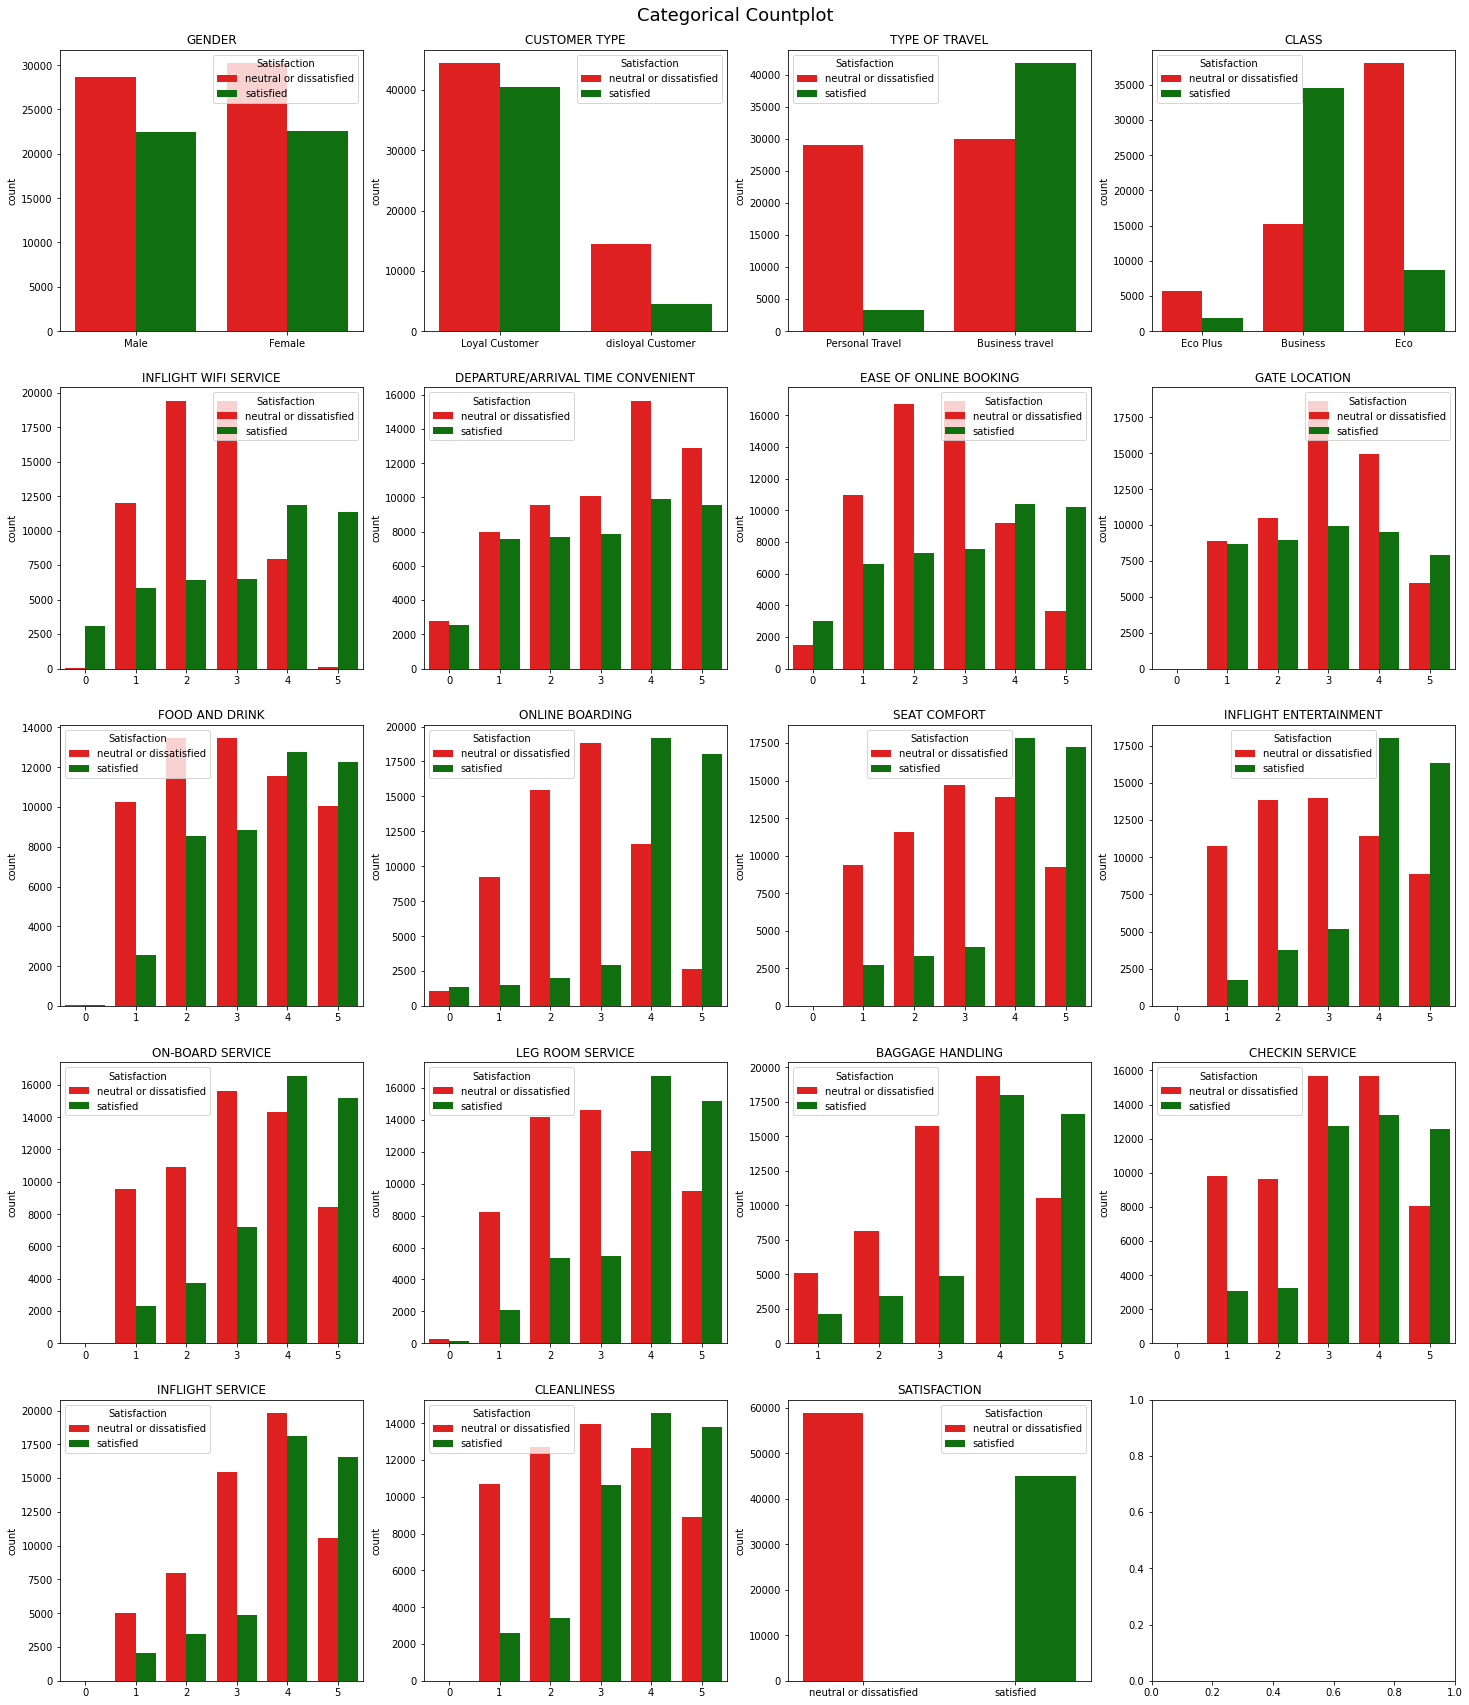

In [ ]:
fig,ax = plt.subplots(5,4,figsize=(25,30))
#plt.subplots_adjust(hspace=0.3)
fig.suptitle("Categorical Countplot", fontsize=18, y=0.9)


for c,ax in zip(categorical_feature,ax.ravel()):
  p = sns.countplot(c ,data=df_categorical, hue = 'Satisfaction', ax=ax, palette=['red','green'])
  ax.set_title(c.upper())
  #ax.get_legend().remove()
  ax.set_xlabel("")

In [ ]:
for col in df_categorical.columns:
  print('----------{}----------'.format(col))
  print(df_categorical[col].value_counts())

----------Gender----------
Female    52727
Male      51177
Name: Gender, dtype: int64
----------Customer Type----------
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
----------Type of Travel----------
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
----------Class----------
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
----------Inflight wifi service----------
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64
----------Departure/Arrival time convenient----------
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64
----------Ease of Online booking----------
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64
----------Gate location----------
3    28577
4    24426
2    19459
1    17562
5    13879
0

In [ ]:
#ordinal encoding
ordinalencoder = OrdinalEncoder()
df_categorical['Customer Type'] = ordinalencoder.fit_transform(asarray(df_categorical['Customer Type']).reshape(-1, 1))
df_categorical['Class'] = ordinalencoder.fit_transform(asarray(df_categorical['Class']).reshape(-1, 1))
df_categorical['Satisfaction'] = ordinalencoder.fit_transform(asarray(df_categorical['Satisfaction']).reshape(-1, 1))

#label encoding
labelencoder = LabelEncoder()
df_categorical['Gender'] = labelencoder.fit_transform(df_categorical['Gender'])
df_categorical['Type of Travel'] = labelencoder.fit_transform(df_categorical['Type of Travel'])

In [ ]:
global_satisfaction = df_categorical.Satisfaction.mean()

for c in categorical_feature:
  print('-'*15,c,'-'*15)
  df_group = df_categorical.groupby(c).Satisfaction.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_satisfaction
  df_group['ratio'] = df_group['mean'] / global_satisfaction
  display(df_group)

--------------- Gender ---------------


,mean,count,diff,ratio
Gender,,,,
0,0.427371,52727,-0.005962,0.986243
1,0.439475,51177,0.006142,1.014174


--------------- Customer Type ---------------


,mean,count,diff,ratio
Customer Type,,,,
0.0,0.477291,84923,0.043959,1.101443
1.0,0.236658,18981,-0.196675,0.546134


--------------- Type of Travel ---------------


,mean,count,diff,ratio
Type of Travel,,,,
0,0.582597,71655,0.149264,1.344457
1,0.101678,32249,-0.331655,0.234641


--------------- Class ---------------


,mean,count,diff,ratio
Class,,,,
0.0,0.694251,49665,0.260919,1.602121
1.0,0.186138,46745,-0.247195,0.429549
2.0,0.246064,7494,-0.187269,0.567840


--------------- Inflight wifi service ---------------


,mean,count,diff,ratio
Inflight wifi service,,,,
0,0.997422,3103,0.564089,2.301746
1,0.325448,17840,-0.107884,0.751036
2,0.248664,25830,-0.184668,0.573842
3,0.250580,25868,-0.182753,0.578262
4,0.598969,19794,0.165637,1.382239
5,0.990758,11469,0.557425,2.286367


--------------- Departure/Arrival time convenient ---------------


,mean,count,diff,ratio
Departure/Arrival time convenient,,,,
0,0.475472,5300,0.042139,1.097244
1,0.486579,15498,0.053246,1.122876
2,0.445407,17191,0.012075,1.027865
3,0.438217,17966,0.004884,1.011271
4,0.387771,25546,-0.045562,0.894858
5,0.425300,22403,-0.008033,0.981463


--------------- Ease of Online booking ---------------


,mean,count,diff,ratio
Ease of Online booking,,,,
0,0.664141,4487,0.230808,1.532635
1,0.376034,17525,-0.057298,0.867773
2,0.303942,24021,-0.129390,0.701407
3,0.308274,24449,-0.125058,0.711403
4,0.530939,19571,0.097606,1.225245
5,0.738286,13851,0.304953,1.703740


--------------- Gate location ---------------


,mean,count,diff,ratio
Gate location,,,,
0,1.000000,1,0.566667,2.307696
1,0.495559,17562,0.062226,1.143598
2,0.460712,19459,0.027380,1.063184
3,0.347202,28577,-0.086130,0.801237
4,0.388520,24426,-0.044812,0.896587
5,0.572376,13879,0.139043,1.320869


--------------- Food and drink ---------------


,mean,count,diff,ratio
Food and drink,,,,
0,0.467290,107,0.033957,1.078362
1,0.200047,12837,-0.233286,0.461647
2,0.387939,21988,-0.045394,0.895245
3,0.396368,22300,-0.036965,0.914696
4,0.524981,24359,0.091648,1.211495
5,0.549007,22313,0.115675,1.266942


--------------- Online boarding ---------------


,mean,count,diff,ratio
Online boarding,,,,
0,0.556425,2428,0.123092,1.284060
1,0.137767,10692,-0.295566,0.317923
2,0.115338,17505,-0.317994,0.266166
3,0.135709,21804,-0.297624,0.313175
4,0.623041,30762,0.189709,1.437790
5,0.871771,20713,0.438439,2.011783


--------------- Seat comfort ---------------


,mean,count,diff,ratio
Seat comfort,,,,
0,0.000000,1,-0.433333,0.000000
1,0.223188,12075,-0.210144,0.515051
2,0.224139,14897,-0.209194,0.517245
3,0.211543,18696,-0.221790,0.488176
4,0.561152,31765,0.127820,1.294969
5,0.650208,26470,0.216875,1.500482


--------------- Inflight entertainment ---------------


,mean,count,diff,ratio
Inflight entertainment,,,,
0,0.000000,14,-0.433333,0.000000
1,0.139846,12478,-0.293487,0.322722
2,0.213302,17637,-0.220031,0.492235
3,0.270077,19139,-0.163256,0.623255
4,0.611766,29423,0.178434,1.411770
5,0.648435,25213,0.215103,1.496391


--------------- On-board service ---------------


,mean,count,diff,ratio
On-board service,,,,
0,0.000000,3,-0.433333,0.000000
1,0.193733,11872,-0.239600,0.447077
2,0.255705,14681,-0.177628,0.590089
3,0.315683,22833,-0.117649,0.728501
4,0.536852,30867,0.103519,1.238890
5,0.642422,23648,0.209090,1.482515


--------------- Leg room service ---------------


,mean,count,diff,ratio
Leg room service,,,,
0,0.351695,472,-0.081638,0.811605
1,0.202840,10353,-0.230493,0.468092
2,0.274673,19525,-0.158659,0.633863
3,0.272415,20098,-0.160918,0.628651
4,0.582306,28789,0.148973,1.343784
5,0.614465,24667,0.181132,1.417997


--------------- Baggage handling ---------------


,mean,count,diff,ratio
Baggage handling,,,,
1,0.297637,7237,-0.135696,0.686856
2,0.295460,11521,-0.137872,0.681833
3,0.235847,20632,-0.197485,0.544264
4,0.480914,37383,0.047581,1.109803
5,0.612694,27131,0.179361,1.413911


--------------- Checkin service ---------------


,mean,count,diff,ratio
Checkin service,,,,
0,0.000000,1,-0.433333,0.000000
1,0.239255,12890,-0.194077,0.552128
2,0.252307,12893,-0.181025,0.582249
3,0.448288,28446,0.014955,1.034512
4,0.459921,29055,0.026588,1.061357
5,0.609777,20619,0.176445,1.407181


--------------- Inflight service ---------------


,mean,count,diff,ratio
Inflight service,,,,
0,0.000000,3,-0.433333,0.000000
1,0.289949,7084,-0.143384,0.669114
2,0.301213,11457,-0.132119,0.695108
3,0.238977,20299,-0.194355,0.551487
4,0.477770,37945,0.044438,1.102549
5,0.609972,27116,0.176639,1.407630


--------------- Cleanliness ---------------


,mean,count,diff,ratio
Cleanliness,,,,
0,0.000000,12,-0.433333,0.000000
1,0.196201,13318,-0.237132,0.452771
2,0.212993,16132,-0.220340,0.491523
3,0.431879,24574,-0.001453,0.996646
4,0.535340,27179,0.102007,1.235401
5,0.608797,22689,0.175465,1.404919


--------------- Satisfaction ---------------


,mean,count,diff,ratio
Satisfaction,,,,
0.0,0.0,58879,-0.433333,0.000000
1.0,1.0,45025,0.566667,2.307696


By looking at the ratio, we can roughly estimate that *Type of Travel* and *Class* have a correlation with *Satisfaction*

## Numerical Data

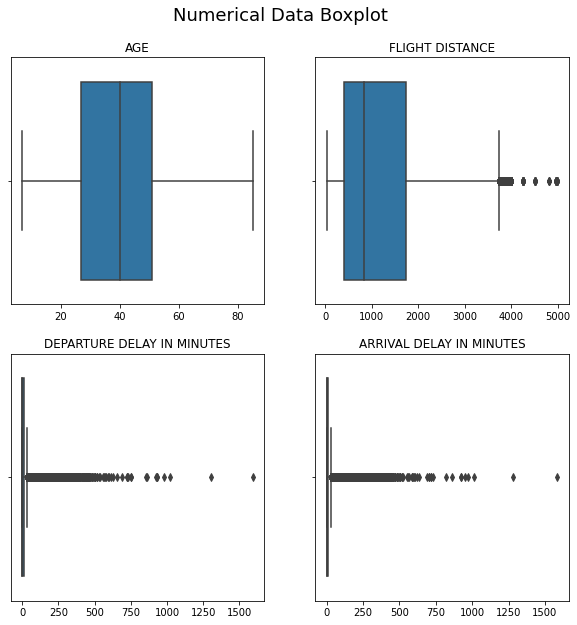

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
#plt.subplots_adjust(hspace=0.3)
fig.suptitle("Numerical Data Boxplot", fontsize=18, y=0.95)


for n,ax in zip(numerical_feature,ax.ravel()):
  p = sns.boxplot(n ,data=df_numerical, ax=ax)
  ax.set_title(n.upper())
  #ax.get_legend().remove()
  ax.set_xlabel("")

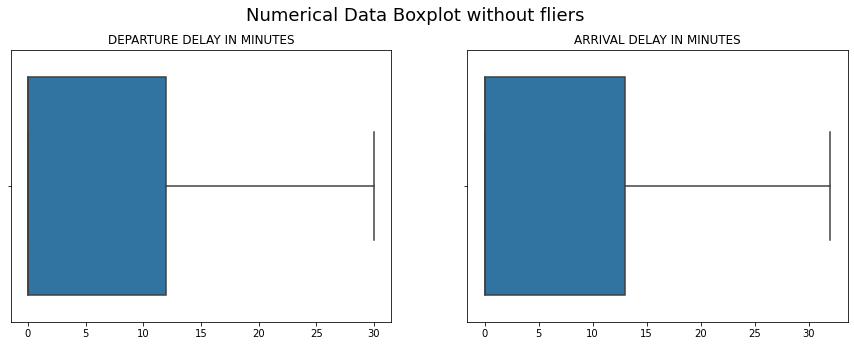

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Numerical Data Boxplot without fliers", fontsize=18, y=1)

for n,ax in zip(['Departure Delay in Minutes', 'Arrival Delay in Minutes'],ax.ravel()):
  p = sns.boxplot(n ,data=df_numerical, ax=ax, showfliers=False)
  ax.set_title(n.upper())
  #ax.get_legend().remove()
  ax.set_xlabel("")

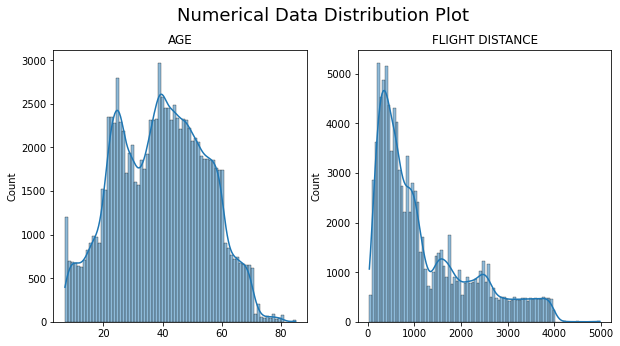

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
#plt.subplots_adjust(hspace=0.3)
fig.suptitle("Numerical Data Distribution Plot", fontsize=18, y=1)

for n,ax in zip(['Age', 'Flight Distance'],ax.ravel()):
  p = sns.histplot(df_numerical[n], ax=ax,kde=True, fill=True)
  ax.set_title(n.upper())
  #ax.get_legend().remove()
  ax.set_xlabel("")




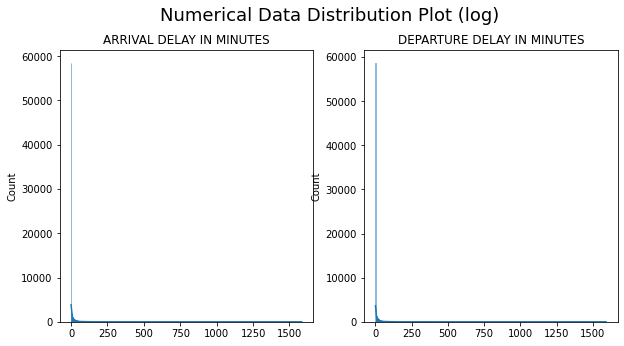

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
#plt.subplots_adjust(hspace=0.3)
fig.suptitle("Numerical Data Distribution Plot (log)", fontsize=18, y=1)

for n,ax in zip(['Arrival Delay in Minutes', 'Departure Delay in Minutes'],ax.ravel()):
  p = sns.histplot(df_numerical[n], ax=ax,kde=True, fill=False)
  ax.set_title(n.upper())
  #ax.get_legend().remove()
  ax.set_xlabel("")
  #p.set(xscale="log")

<Figure size 1080x1080 with 0 Axes>

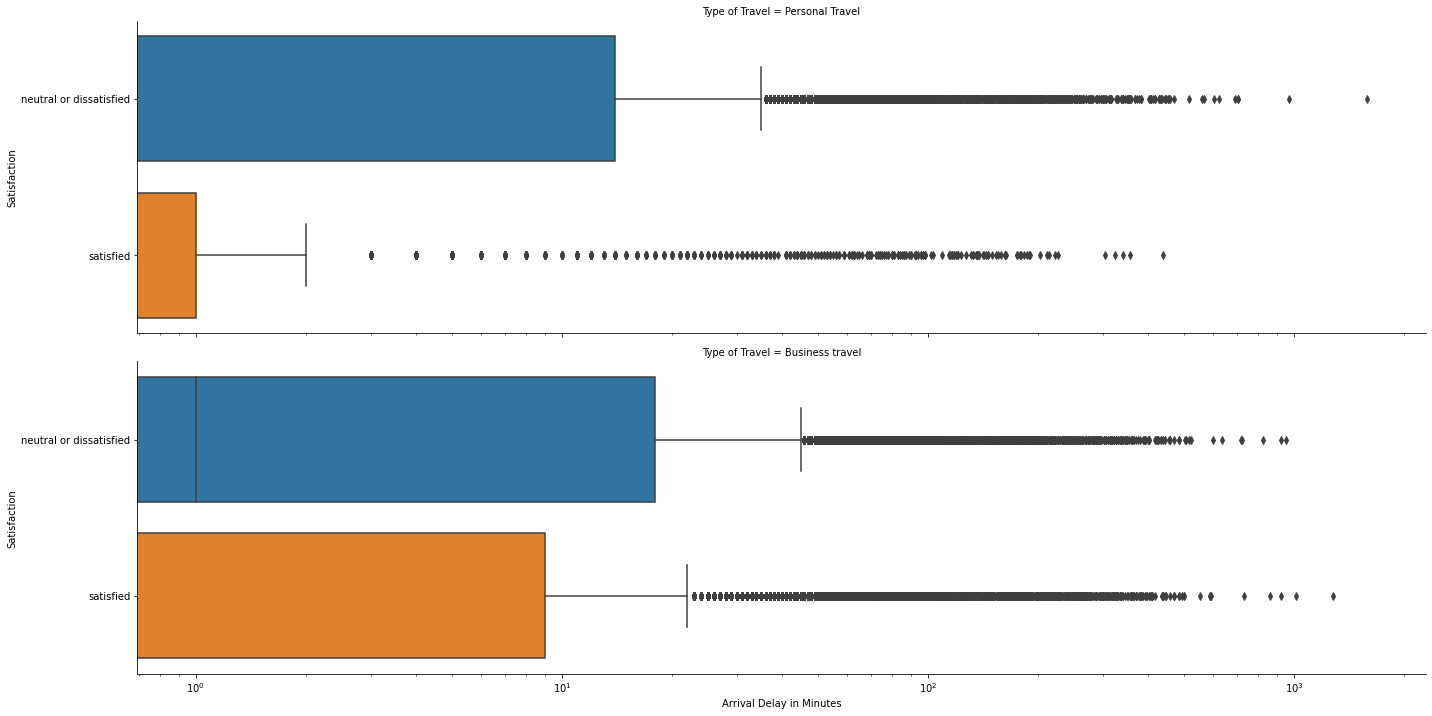

In [ ]:
plt.figure(figsize=(15, 15))

g = sns.catplot(x="Arrival Delay in Minutes", y="Satisfaction",row="Type of Travel",
                kind="box", orient="h", aspect=4,
                data=train_data)
g.set(xscale="log")

<Figure size 1080x1080 with 0 Axes>

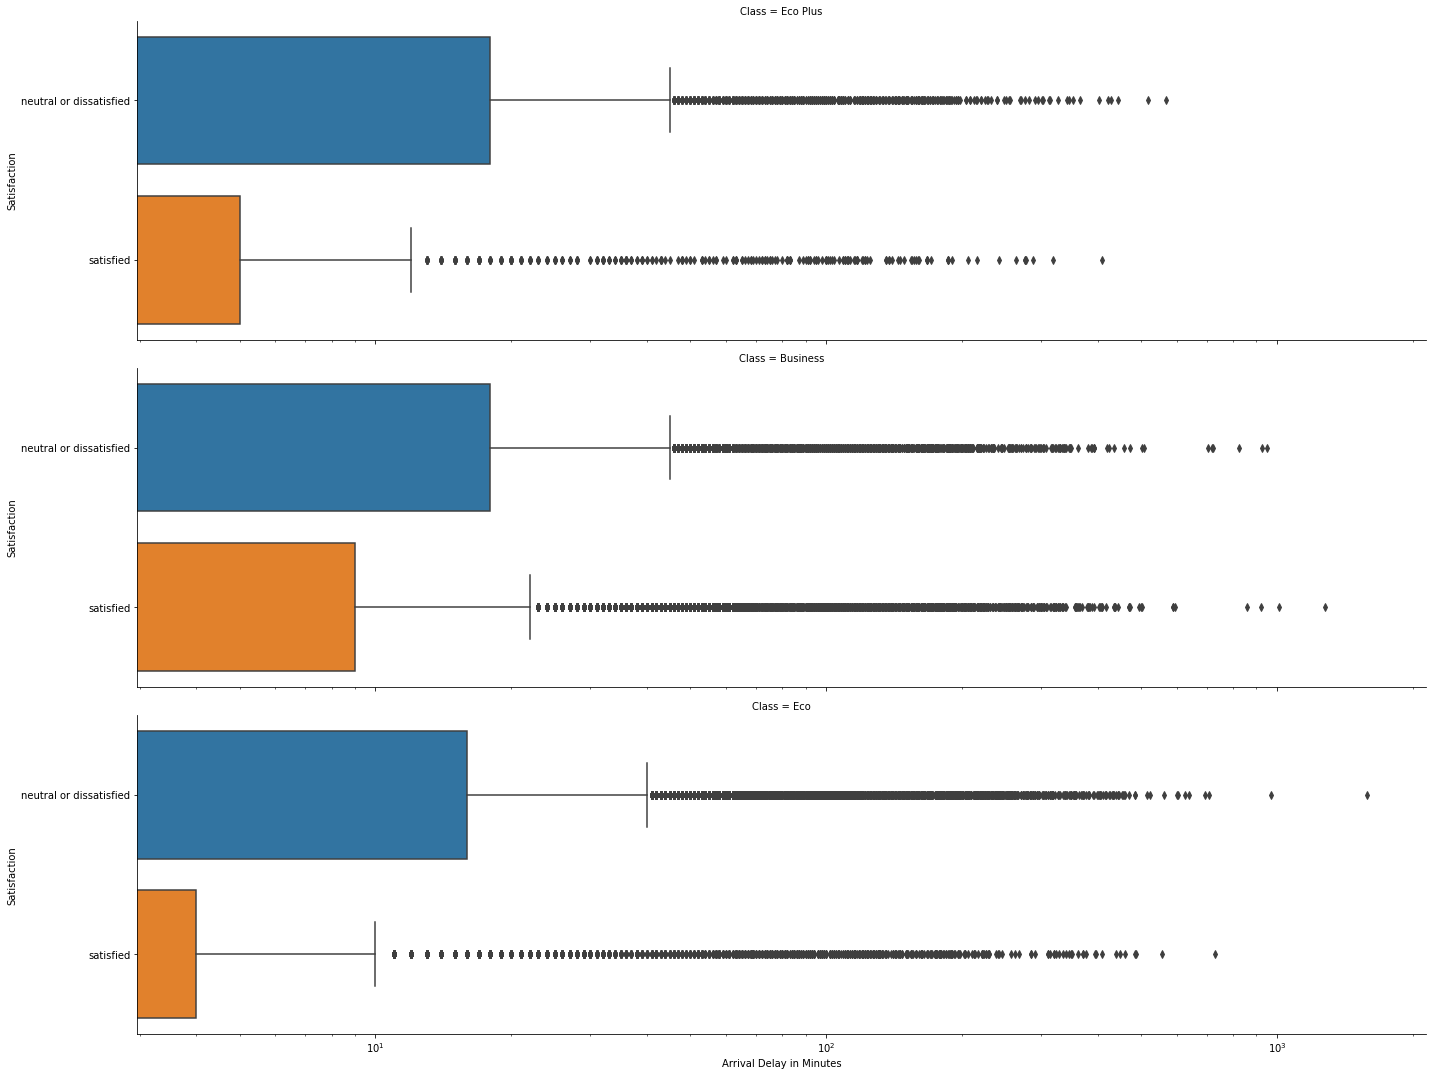

In [ ]:
plt.figure(figsize=(15, 15))

g = sns.catplot(x="Arrival Delay in Minutes", y="Satisfaction",row="Class",
                kind="box", orient="h", aspect=4,
                data=train_data)
g.set(xscale="log")

<Figure size 1080x1080 with 0 Axes>

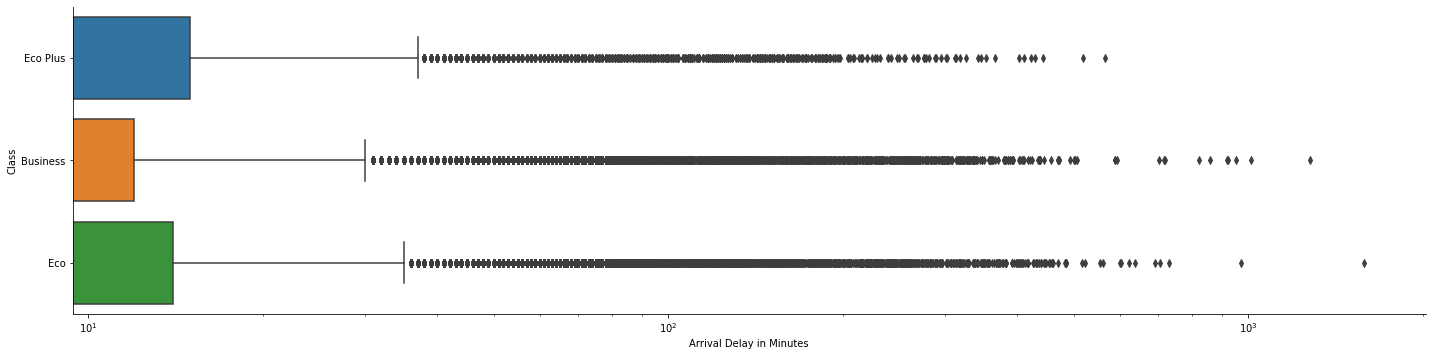

In [ ]:
plt.figure(figsize=(15, 15))

g = sns.catplot(x="Arrival Delay in Minutes", y="Class",
                kind="box", orient="h", aspect=4,
                data=train_data)
g.set(xscale="log")
plt.show()

<Figure size 1080x1080 with 0 Axes>

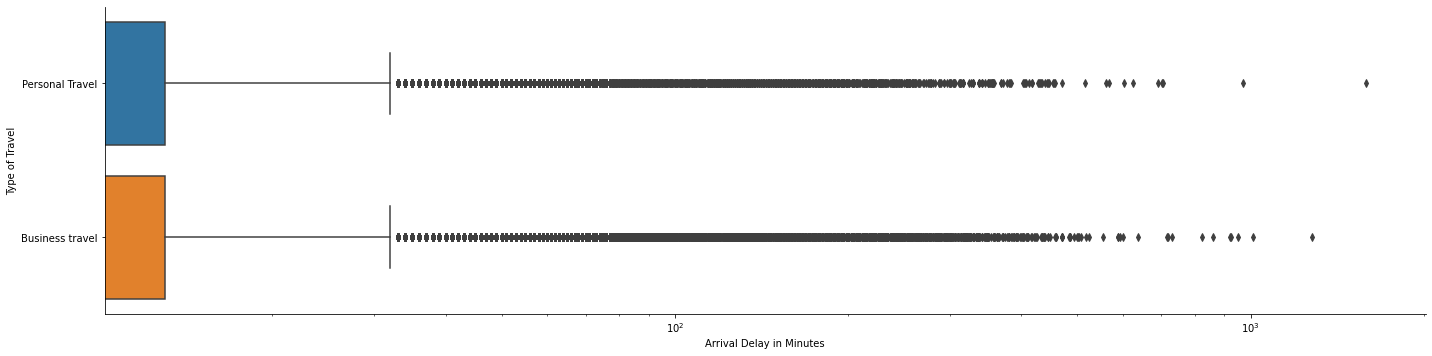

In [ ]:
plt.figure(figsize=(15, 15))

g = sns.catplot(x="Arrival Delay in Minutes", y="Type of Travel",
                kind="box", orient="h", aspect=4,
                data=train_data)
g.set(xscale="log")

In [ ]:
np.round(train_data['Satisfaction'].value_counts(normalize=True),3)

neutral or dissatisfied    0.567
satisfied                  0.433
Name: Satisfaction, dtype: float64

We have a not balanced data...

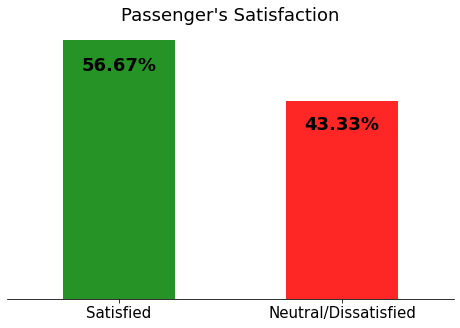

In [ ]:
plt.figure(figsize=(8, 5))
train_data['Satisfaction'].value_counts(normalize=True).plot(kind='bar', rot=0, color = ['green', 'red'], alpha=0.85)
plt.title("Passenger's Satisfaction", fontsize=18)
plt.xticks([0,1], ['Satisfied', 'Neutral/Dissatisfied'], rotation='horizontal', fontsize=15)
plt.text(0,0.5,'56.67%',horizontalalignment='center', fontsize=18, fontweight='bold')
plt.text(1,0.37,'43.33%',horizontalalignment='center', fontsize=18, fontweight='bold')
plt.yticks([], label='') #hide the yticks label
sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()


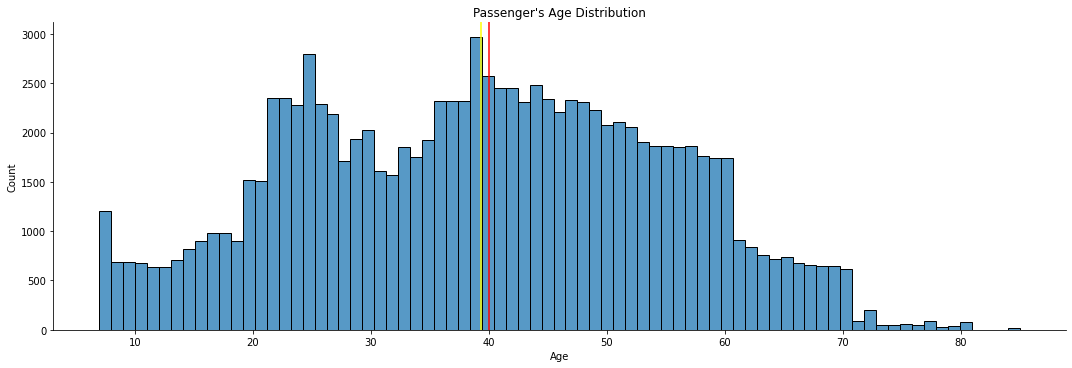

In [ ]:
sns.displot(x=train_data['Age'], aspect=3).set(title="Passenger's Age Distribution")
age_median = train_data['Age'].median()
age_mean = train_data['Age'].mean()
plt.axvline(x=age_median, color='red')
plt.axvline(x=age_mean, color='yellow')
plt.show();

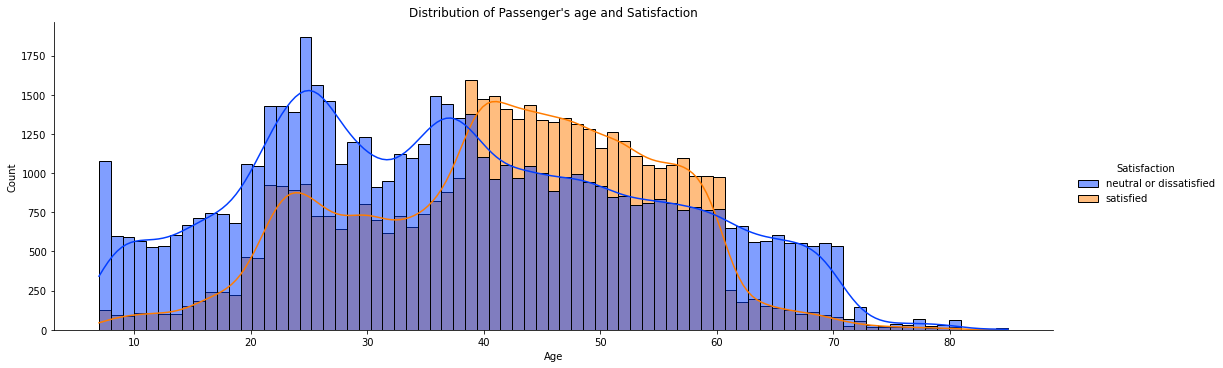

In [ ]:
ax = sns.displot(x=train_data['Age'],kde=True, fill=True, palette=sns.color_palette('bright')[:2], aspect=3, hue=train_data['Satisfaction']
                 ).set(title="Distribution of Passenger's age and Satisfaction");

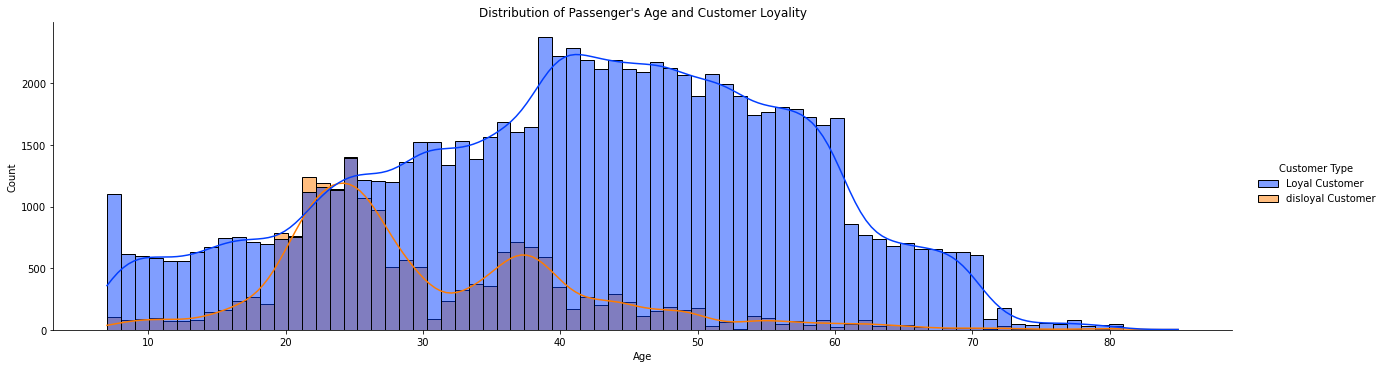

In [ ]:
ax = sns.displot(x=train_data['Age'],kde=True, fill=True, palette=sns.color_palette('bright')[:2], aspect=3.5, hue=train_data['Customer Type']
                 ).set(title="Distribution of Passenger's Age and Customer Loyality");

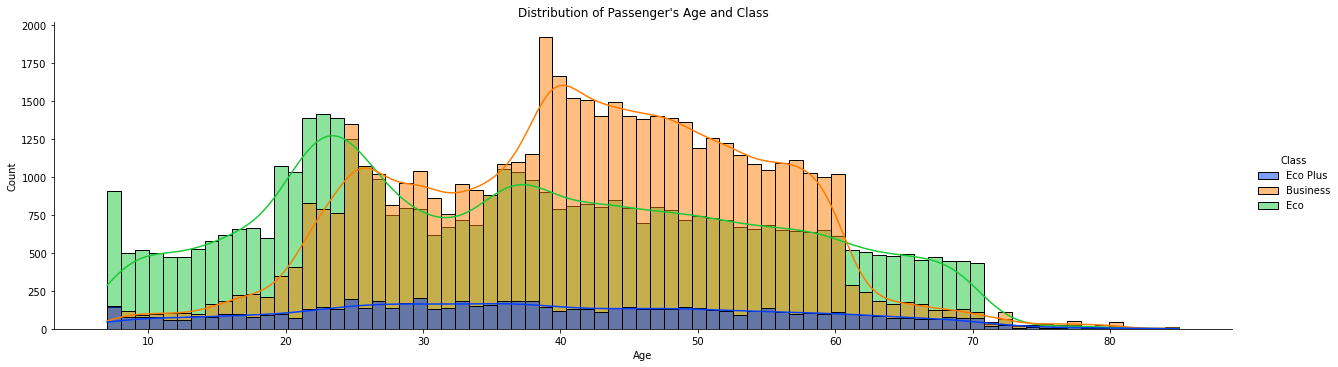

In [ ]:
ax = sns.displot(x=train_data['Age'],kde=True, fill=True, palette=sns.color_palette('bright')[:3], aspect=3.5, hue=train_data['Class']
                 ).set(title="Distribution of Passenger's Age and Class");

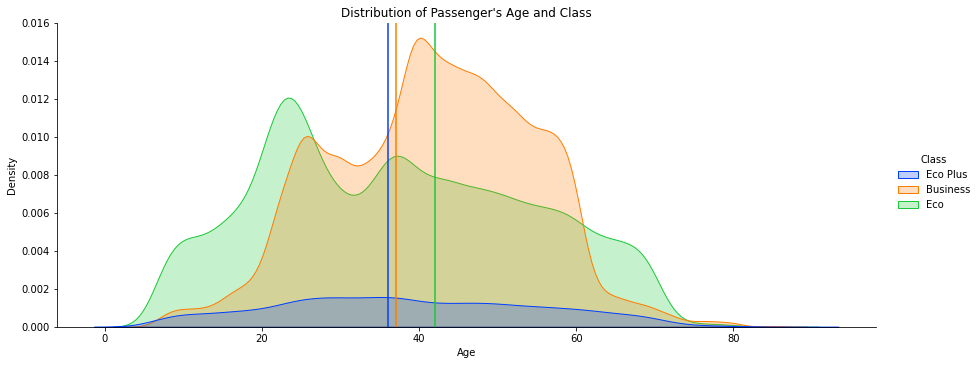

In [ ]:
ax = sns.displot(x=train_data['Age'],kind='kde', fill=True, palette=sns.color_palette('bright')[:3], aspect=2.5, hue=train_data['Class']
                 ).set(title="Distribution of Passenger's Age and Class")
class_0_median = train_data[train_data['Class']=='Eco']['Age'].median()
class_1_median = train_data[train_data['Class']=='Eco Plus']['Age'].median()
class_2_median = train_data[train_data['Class']=='Business']['Age'].median()
plt.axvline(x=class_0_median, color=sns.color_palette('bright')[0])
plt.axvline(x=class_1_median, color=sns.color_palette('bright')[1])
plt.axvline(x=class_2_median, color=sns.color_palette('bright')[2])
#plt.text(x=expensive_median+10, y=0.0014, s='Median',fontsize=10, color='blue')
#plt.text(x=not_expensive_median+10 , y=0.0014, s='Median',fontsize=10, color='red');

In [ ]:
train_data['Type of Travel'].value_counts(normalize=True)

Business travel    0.689627
Personal Travel    0.310373
Name: Type of Travel, dtype: float64

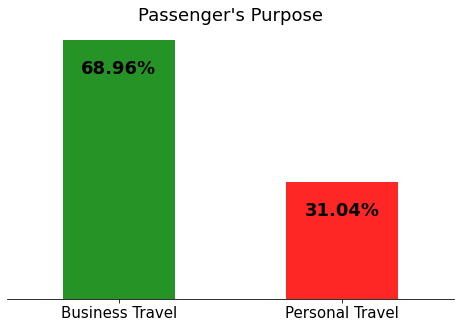

In [ ]:
plt.figure(figsize=(8, 5))
train_data['Type of Travel'].value_counts(normalize=True).plot(kind='bar', rot=0, color = ['green', 'red'], alpha=0.85)
plt.title("Passenger's Purpose", fontsize=18)
plt.xticks([0,1], ['Business Travel', 'Personal Travel'], rotation='horizontal', fontsize=15)
plt.text(0,0.6,'68.96%',horizontalalignment='center', fontsize=18, fontweight='bold')
plt.text(1,0.22,'31.04%',horizontalalignment='center', fontsize=18, fontweight='bold')
plt.yticks([], label='') #hide the yticks label
sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

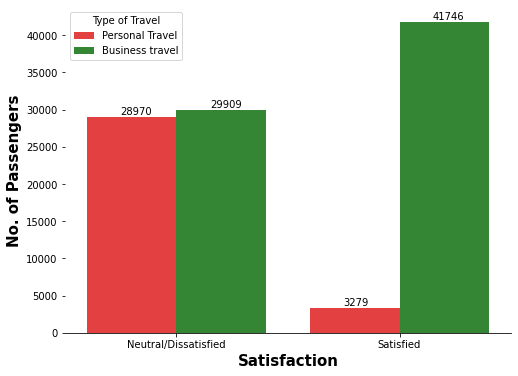

In [ ]:
fig = plt.figure(figsize=[8,6])
ax = sns.countplot(data=train_data,x='Satisfaction',hue='Type of Travel',palette=['Red', 'Green'], alpha=0.85)
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
#plt.text(-0.2,19177,'19177',horizontalalignment='center', fontsize=18)
#plt.text(1,0.22,'31.04%',horizontalalignment='center', fontsize=18)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.15, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine(top=True, right=True, left=True, bottom=False);  

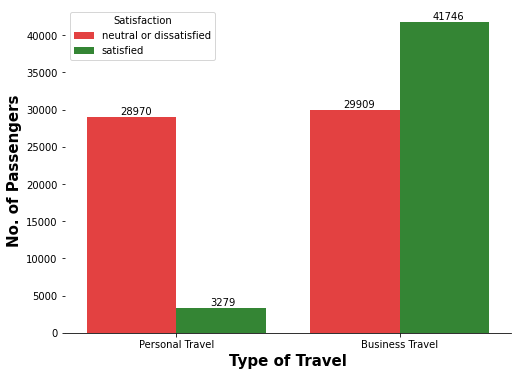

In [ ]:
fig = plt.figure(figsize=[8,6])
ax = sns.countplot(data=train_data,x='Type of Travel',hue='Satisfaction',palette=['Red', 'Green'], alpha=0.85)
ax.set_xticklabels(['Personal Travel','Business Travel'])
#plt.text(-0.2,19177,'19177',horizontalalignment='center', fontsize=18)
#plt.text(1,0.22,'31.04%',horizontalalignment='center', fontsize=18)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.15, p.get_height()+400))
plt.xlabel('Type of Travel',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine(top=True, right=True, left=True, bottom=False);  

In [ ]:
train_data['Customer Type'].value_counts(normalize=True)

Loyal Customer       0.817322
disloyal Customer    0.182678
Name: Customer Type, dtype: float64

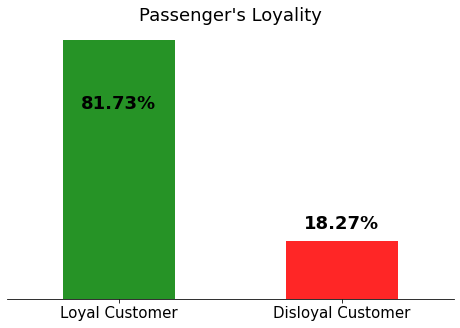

In [ ]:
plt.figure(figsize=(8, 5))
train_data['Customer Type'].value_counts(normalize=True).plot(kind='bar', rot=0, color = ['green', 'red'], alpha=0.85)
plt.title("Passenger's Loyality", fontsize=18)
plt.xticks([0,1], ['Loyal Customer', 'Disloyal Customer'], rotation='horizontal', fontsize=15)
plt.text(0,0.6,'81.73%',horizontalalignment='center', fontsize=18, fontweight='bold')
plt.text(1,0.22,'18.27%',horizontalalignment='center', fontsize=18, fontweight='bold')
plt.yticks([], label='') #hide the yticks label
sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()

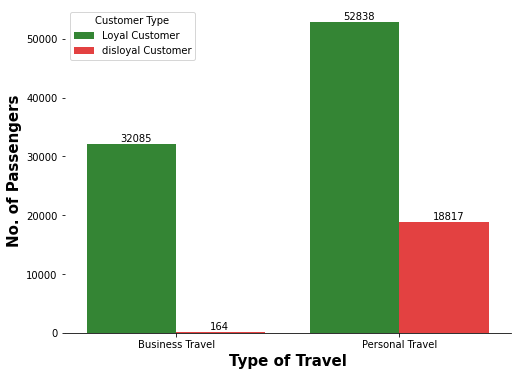

In [ ]:
fig = plt.figure(figsize=[8,6])
ax = sns.countplot(data=train_data,x='Type of Travel',hue='Customer Type',palette=['Green', 'Red'], alpha=0.85)
ax.set_xticklabels(['Business Travel','Personal Travel'])
#plt.text(-0.2,19177,'19177',horizontalalignment='center', fontsize=18)
#plt.text(1,0.22,'31.04%',horizontalalignment='center', fontsize=18)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.15, p.get_height()+400))
plt.xlabel('Type of Travel',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')
sns.despine(top=True, right=True, left=True, bottom=False);  

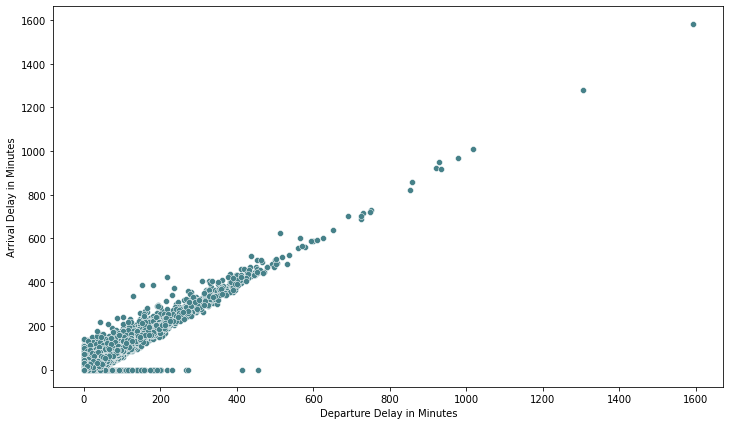

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
sns.scatterplot(x=train_data['Departure Delay in Minutes'],y=train_data['Arrival Delay in Minutes'], color='#468189');

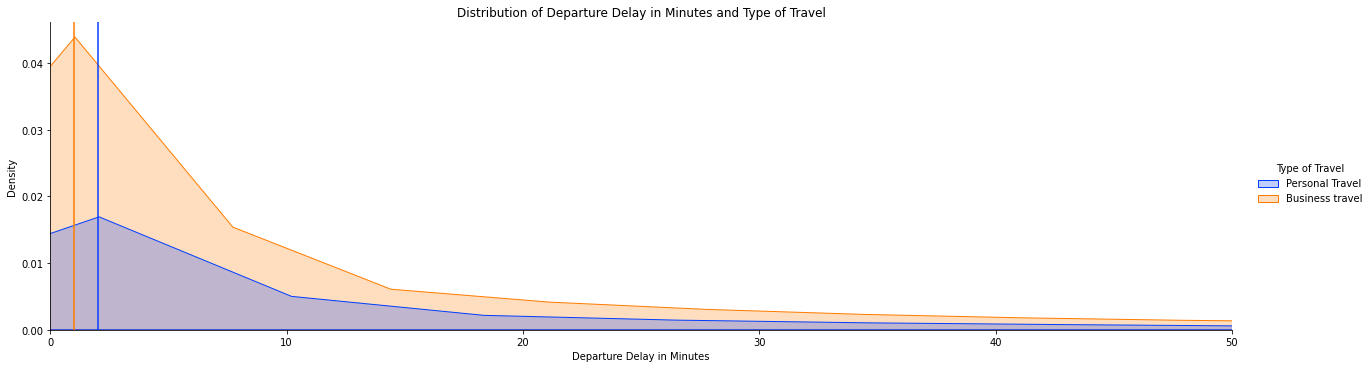

In [ ]:
ax = sns.displot(x=train_data['Departure Delay in Minutes'],kind='kde', fill=True, palette=sns.color_palette('bright')[:2], aspect=3.5, hue=train_data['Type of Travel']
                 ).set(title="Distribution of Departure Delay in Minutes and Type of Travel");
ax.set(xlim=(0, 50))
plt.axvline(x=1, color=sns.color_palette('bright')[1])
plt.axvline(x=2, color=sns.color_palette('bright')[0])

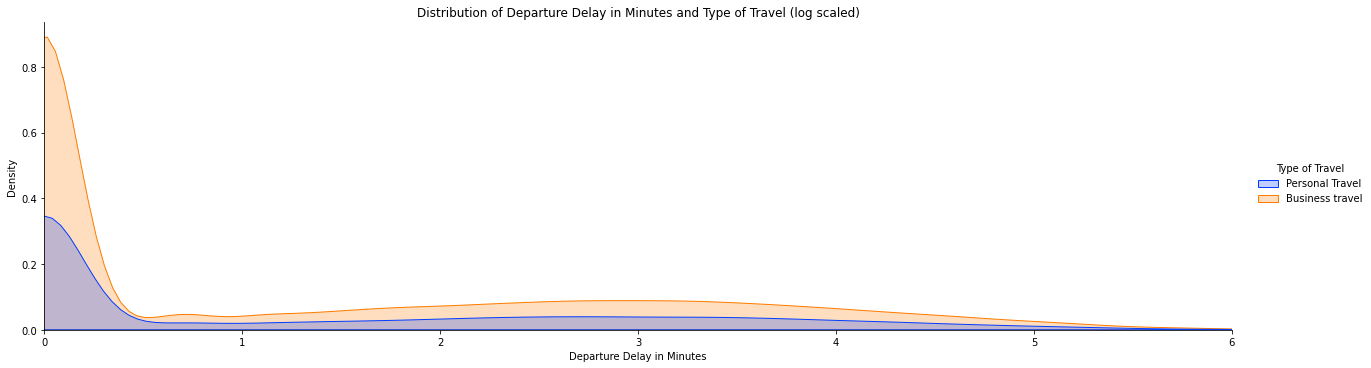

In [ ]:
ax = sns.displot(x=np.log1p(train_data['Departure Delay in Minutes']),kind='kde', fill=True, palette=sns.color_palette('bright')[:2], aspect=3.5, hue=train_data['Type of Travel']
                 ).set(title="Distribution of Departure Delay in Minutes and Type of Travel (log scaled)");
ax.set(xlim=(0, 6))

i dont think that delay on business and personal travel are different. it shows the same median and mean

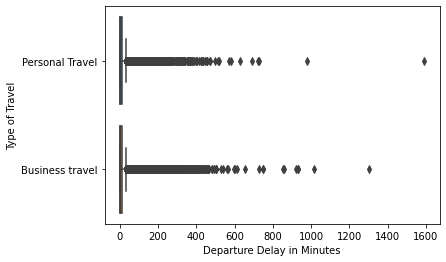

In [ ]:
ax = sns.boxplot(x="Departure Delay in Minutes", y="Type of Travel", data=train_data)

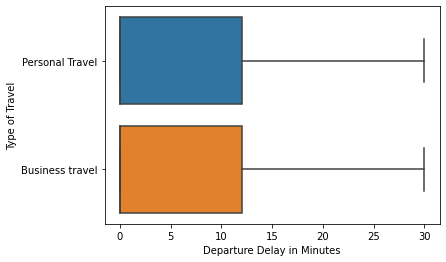

In [ ]:
ax = sns.boxplot(x="Departure Delay in Minutes", y="Type of Travel", data=train_data, showfliers = False)

Observations:
1. Customer's satisfaction is not balance, 56% vs 44%
2. Customer's age has a decently normal distribution
3. Older customers are easier to be satisfied than younger customers
4. Older customers tend to be more loyal than younger customers
5. We have around 69% of customers that flight for Business Travel and 31% of customers that flight Personal Travel
6. Customers at Business Class tend have higher flight distance than other class. Customer who have a shorter flight distance tend to purchase an economic class
7. We have more loyal customer than disloyal customer, 81% vs 19%
8. Arrival delay in minutes and departure delay in minutes have a high correlation

## Likert-scaled Data

In [ ]:
#get the list of questions
likert_data = train_data.iloc[:,6:20]

likert_df = pd.concat([likert_data[column].value_counts(normalize=True) for column in likert_data], axis = 1).T
questions = likert_df.index.to_list()
questions

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [ ]:
ind = [x for x, _ in enumerate(questions)]

strongdisagree = likert_df.iloc[:,1]
disagree = likert_df.iloc[:,2]
neutral = likert_df.iloc[:,3]
agree = likert_df.iloc[:,4]
strongagree = likert_df.iloc[:,5]

total = strongdisagree+disagree+neutral+agree+strongagree
proportion_strongdisagree = np.true_divide(strongdisagree, total) * 100
proportion_disagree = np.true_divide(disagree, total) * 100
proportion_neutral = np.true_divide(neutral, total) * 100
proportion_agree = np.true_divide(agree, total) * 100
proportion_strongagree = np.true_divide(strongagree, total) * 100


likert_temp = likert_df.iloc[:,1:]
df_likert = pd.DataFrame(likert_temp).reset_index()
df_likert = df_likert.rename(columns={'index':'Questions', 1: 'Strongly disagree', 2: 'Disagree', 3:'Neither agree nor disagree', 4:'Agree', 5:'Strongly agree'})
df_likert[['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']] = round(df_likert[['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']]*100, 2)
df_likert

,Questions,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
0,Inflight wifi service,17.17,24.86,24.90,19.05,11.04
1,Departure/Arrival time convenient,14.92,16.55,17.29,24.59,21.56
2,Ease of Online booking,16.87,23.12,23.53,18.84,13.33
3,Gate location,16.90,18.73,27.50,23.51,13.36
4,Food and drink,12.35,21.16,21.46,23.44,21.47
5,Online boarding,10.29,16.85,20.98,29.61,19.93
6,Seat comfort,11.62,14.34,17.99,30.57,25.48
7,Inflight entertainment,12.01,16.97,18.42,28.32,24.27
8,On-board service,11.43,14.13,21.98,29.71,22.76
9,Leg room service,9.96,18.79,19.34,27.71,23.74


In [ ]:
#make a dictionary consist of the percentage of likert-scaled data

dicti = {}
for i in range(0,14):
    dicti[df_likert.iloc[i].to_list()[0]] = df_likert.iloc[i].to_list()[1:]

In [ ]:
dicti

{'Baggage handling': [6.97, 11.09, 19.86, 35.98, 26.11],
 'Checkin service': [12.41, 12.41, 27.38, 27.96, 19.84],
 'Cleanliness': [12.82, 15.53, 23.65, 26.16, 21.84],
 'Departure/Arrival time convenient': [14.92, 16.55, 17.29, 24.59, 21.56],
 'Ease of Online booking': [16.87, 23.12, 23.53, 18.84, 13.33],
 'Food and drink': [12.35, 21.16, 21.46, 23.44, 21.47],
 'Gate location': [16.9, 18.73, 27.5, 23.51, 13.36],
 'Inflight entertainment': [12.01, 16.97, 18.42, 28.32, 24.27],
 'Inflight service': [6.82, 11.03, 19.54, 36.52, 26.1],
 'Inflight wifi service': [17.17, 24.86, 24.9, 19.05, 11.04],
 'Leg room service': [9.96, 18.79, 19.34, 27.71, 23.74],
 'On-board service': [11.43, 14.13, 21.98, 29.71, 22.76],
 'Online boarding': [10.29, 16.85, 20.98, 29.61, 19.93],
 'Seat comfort': [11.62, 14.34, 17.99, 30.57, 25.48]}

In [ ]:
#make a function to visualize 
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']

def survey(results, category_names):
     
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(20, 12))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)
    
    # X Axis
    ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-90, 91, 10))
    #ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    ax.xaxis.set_major_formatter(ticker.PercentFormatter())
    plt.xticks(fontsize=13)

    # Y Axis
    ax.invert_yaxis()
    plt.yticks(fontsize=15)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Legend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium', prop={'size': 14})
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


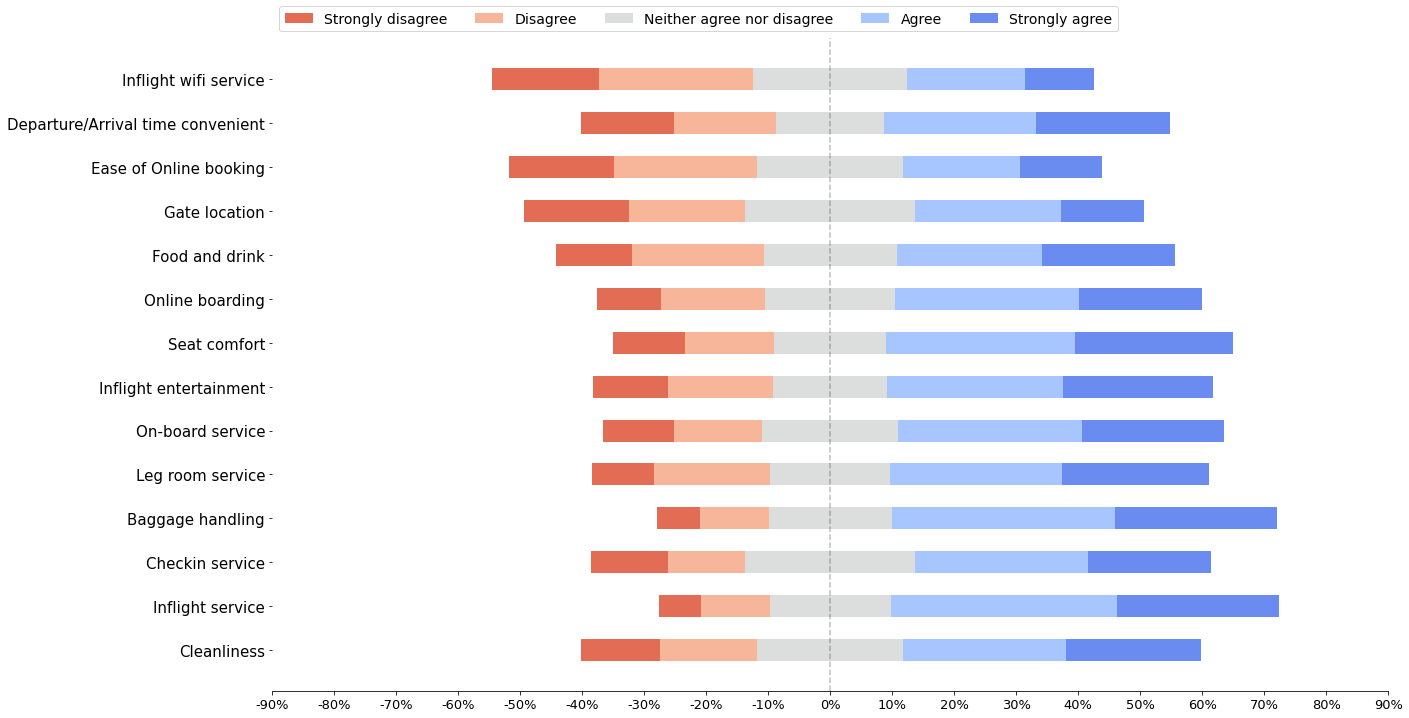

In [ ]:
fig, ax = survey(dicti, category_names)
plt.show()

In [ ]:
#make a function to filter the data, sort the data, and visualize with stacked bar chart
def show_chart(viz_data, title):
  
  #create and sort the data
  viz_data = viz_data.iloc[:,6:20]
  viz_data = pd.concat([viz_data[column].value_counts(normalize=True) for column in viz_data], axis = 1).T
  viz_data = viz_data.iloc[:,1:]
  viz_data['total'] = viz_data[1.0] + viz_data[2.0] + viz_data[3.0]/2
  viz_data = viz_data.sort_values(by=['total'], ascending=[False])
  viz_data = viz_data.drop('total', axis=1)

  #create a dataframe
  df_viz = pd.DataFrame(viz_data).reset_index()
  df_viz = df_viz.rename(columns={'index':'Questions', 1: 'Strongly disagree', 2: 'Disagree', 3:'Neither agree nor disagree', 4:'Agree', 5:'Strongly agree'})
  df_viz[['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']] = round(df_viz[['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']]*100, 2)

  #create a dictionary
  dict_viz = {}
  for i in range(0,14):
      dict_viz[df_viz.iloc[i].to_list()[0]] = df_viz.iloc[i].to_list()[1:]

  #visualization
  category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']

  labels = list(dict_viz.keys())
  data = np.array(list(dict_viz.values()))
  data_cum = data.cumsum(axis=1)
  middle_index = data.shape[1]//2
  offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
  # Color Mapping
  category_colors = plt.get_cmap('coolwarm_r')(
      np.linspace(0.15, 0.85, data.shape[1]))
    
  fig, ax = plt.subplots(figsize=(20, 12))
    
  # Plot Bars
  for i, (colname, color) in enumerate(zip(category_names, category_colors)):
      widths = data[:, i]
      starts = data_cum[:, i] - widths - offsets
      rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
  # Add Zero Reference Line
  ax.axvline(0, linestyle='--', color='black', alpha=.25)
    
  # X Axis
  ax.set_xlim(-90, 90)
  ax.set_xticks(np.arange(-90, 91, 10))
  #ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
  ax.xaxis.set_major_formatter(ticker.PercentFormatter())
  plt.xticks(fontsize=13)

  # Y Axis
  ax.invert_yaxis()
  plt.yticks(fontsize=15)

  # Remove spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
    
  # Legend
  ax.legend(ncol=len(category_names), bbox_to_anchor=(0.15,1),
            loc='lower left', fontsize='medium', prop={'size': 14})
    
  plt.title(label = title, loc="left", fontstyle='oblique', fontsize = 20, backgroundcolor='green', color='white', x=-0.2, y=1)

  # Set Background Color
  fig.set_facecolor('#FFFFFF')

  return fig, ax

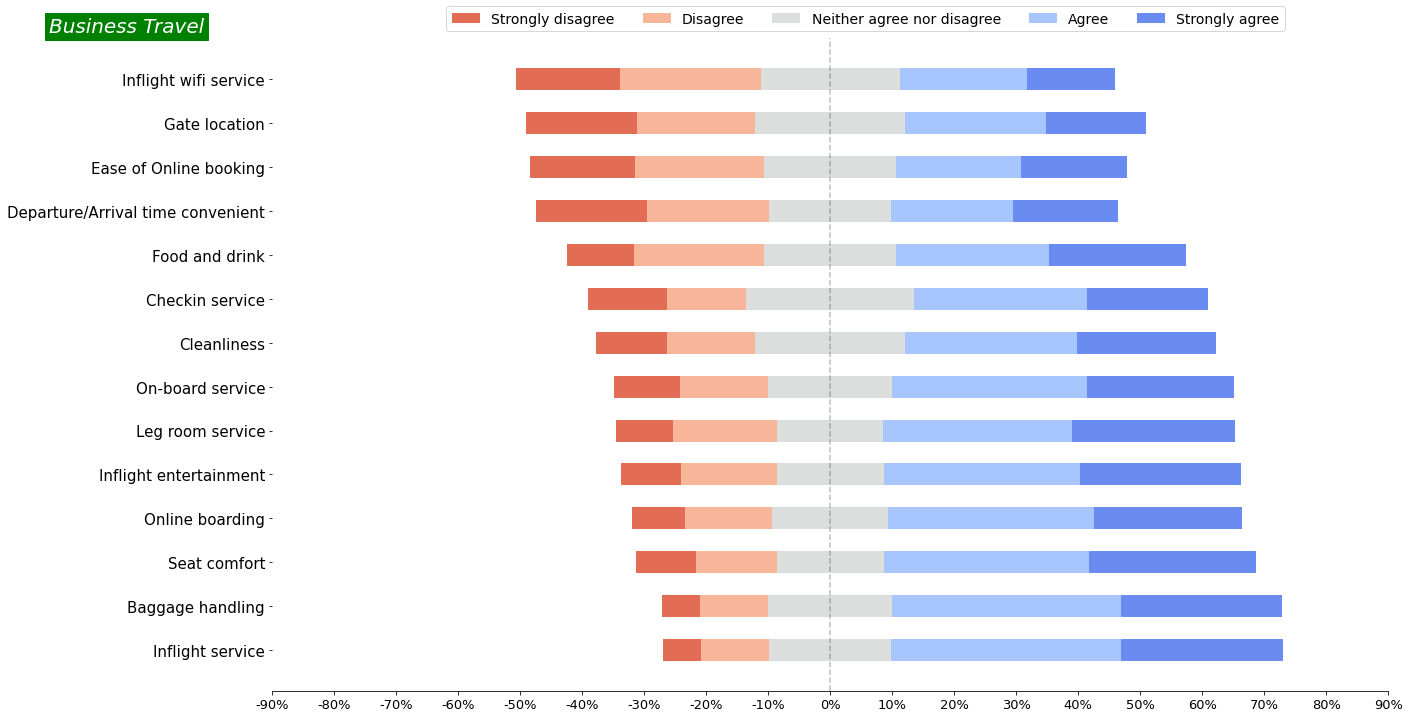

In [ ]:
business_data = train_data[train_data['Type of Travel']=='Business travel']
fig, ax = show_chart(business_data, 'Business Travel')
plt.show()

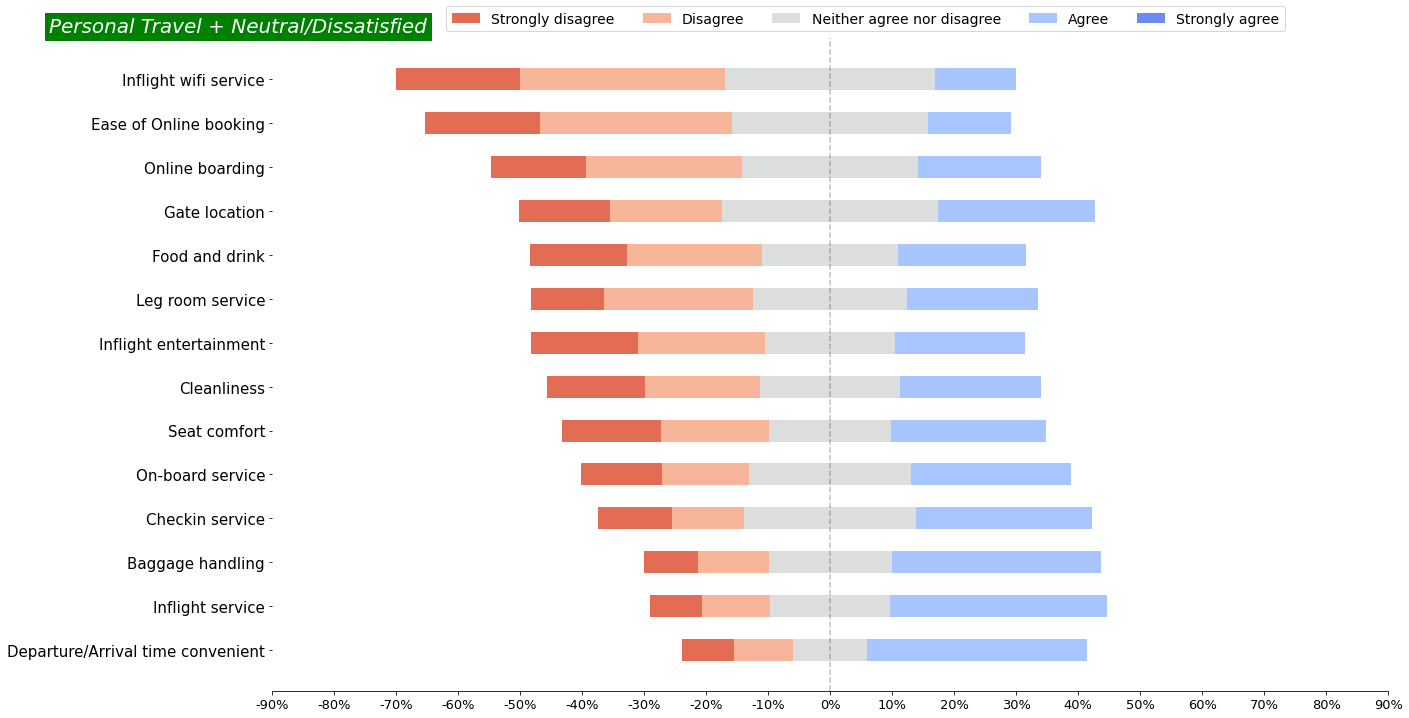

In [ ]:
personal_dissatisfied_data = train_data[(train_data['Satisfaction']=='neutral or dissatisfied') & (train_data['Type of Travel']=='Personal Travel')]
fig, ax = show_chart(personal_dissatisfied_data, 'Personal Travel + Neutral/Dissatisfied')
plt.show()

Business Insight : Personal Travelers are not giving a low score to 'Departure/Arrival time convenient'

In [ ]:
a = train_data[train_data['Type of Travel']=='Personal Travel']['Departure Delay in Minutes']==0
print(a.shape)
print(a.sum())
print('there are', np.round(a.sum()*100/a.shape[0],2), '% flights that are not delay (Personal Travel only)')

(32249,)
18229
there are 56.53 % flights that are not delay (Personal Travel only)


In [ ]:
a = train_data[train_data['Type of Travel']=='Business travel']['Departure Delay in Minutes']==0
print(a.shape)
print(a.sum())
print('there are', np.round(a.sum()*100/a.shape[0],2), '% flights that are not delay (Business Travel only)')

(71655,)
40439
there are 56.44 % flights that are not delay (Business Travel only)


In [ ]:
train_data.groupby('Type of Travel')[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].agg(['mean', 'median']).round(2).rename(columns={'mean':'Mean', 'median':'Median'}).T

Type of Travel                     Business travel  Personal Travel
Arrival Delay in Minutes   Mean              15.29            14.80
                           Median             0.00             0.00
Departure Delay in Minutes Mean              14.95            14.51
                           Median             0.00             0.00

Another Business Insight: Personal Travelers are not giving a low score to 'Departure/Arrival time convenient', **even though the mean of arrival and departure delay in minutes are the same between Business Traveler and Personal Traveler**

# Modeling

## Baseline model with CV

### Without SMOTE

In [ ]:
#encoding categorical data

#ordinal encoding
ordinalencoder = OrdinalEncoder()
train_data['Customer Type'] = ordinalencoder.fit_transform(asarray(train_data['Customer Type']).reshape(-1, 1))
train_data['Class'] = ordinalencoder.fit_transform(asarray(train_data['Class']).reshape(-1, 1))
train_data['Satisfaction'] = ordinalencoder.fit_transform(asarray(train_data['Satisfaction']).reshape(-1, 1))

test_data['Customer Type'] = ordinalencoder.fit_transform(asarray(test_data['Customer Type']).reshape(-1, 1))
test_data['Class'] = ordinalencoder.fit_transform(asarray(test_data['Class']).reshape(-1, 1))
test_data['Satisfaction'] = ordinalencoder.fit_transform(asarray(test_data['Satisfaction']).reshape(-1, 1))

#label encoding
labelencoder = LabelEncoder()
train_data['Gender'] = labelencoder.fit_transform(train_data['Gender'])
train_data['Type of Travel'] = labelencoder.fit_transform(train_data['Type of Travel'])

test_data['Gender'] = labelencoder.fit_transform(test_data['Gender'])
test_data['Type of Travel'] = labelencoder.fit_transform(test_data['Type of Travel'])

In [ ]:
#split the data
X_train_ = train_data.drop('Satisfaction', axis=1)
y_train_ = train_data.iloc[:,-1:]
X_test = test_data.drop('Satisfaction', axis=1)
y_test = test_data.iloc[:,-1:]

#split train set into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=0.3, random_state=42)

In [ ]:
kfold = StratifiedKFold(n_splits=5)

random_state = 42
models = []

models.append(LogisticRegression(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(lgb.LGBMClassifier(random_state=random_state))


cv_results = []
for model in models :
    cv_results.append(cross_val_score(model, X_train, y = y_train, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","SVC","DecisionTree","RandomForest","LightGBM"]})

In [ ]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.806165,0.013468,LogisticRegression
1,0.667437,0.004739,SVC
2,0.944357,0.003256,DecisionTree
3,0.961406,0.001871,RandomForest
4,0.963469,0.001507,LightGBM


### With SMOTE

In [ ]:
from imblearn import under_sampling, over_sampling
# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train_, y_train_)

df_oversampling_baseline_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_baseline_smote.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,1,0.0,13,1,2.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0.0
1,1,1.0,25,0,0.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0.0
2,0,0.0,26,0,0.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1.0


In [ ]:
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_over_smote, y_over_smote, test_size=0.3, random_state=42)

In [ ]:
kfold = StratifiedKFold(n_splits=5)

random_state = 42
models = []

models.append(LogisticRegression(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(lgb.LGBMClassifier(random_state=random_state))


cv_results = []
for model in models :
    cv_results.append(cross_val_score(model, X_train_smote, y = y_train_smote, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","SVC","DecisionTree","RandomForest","LightGBM"]})

cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.810991,0.014509,LogisticRegression
1,0.645639,0.003094,SVC
2,0.942848,0.002985,DecisionTree
3,0.960560,0.001542,RandomForest
4,0.962890,0.001629,LightGBM


## Forward Elimination

### Without Smote

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sbs = SFS(lgb.LGBMClassifier(),
         k_features=(16),
         forward=True,
         floating=False,
         cv=3)
sbs.fit(X_train, y_train)
sbs.k_feature_names_

('Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes')

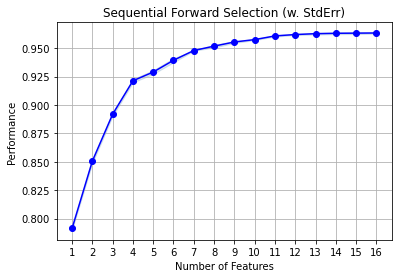

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
list_fs = list(sbs.k_feature_names_)

for i in X_train.columns:
  if i not in list_fs:
    print(i)

Gender
Flight Distance
Departure/Arrival time convenient
Ease of Online booking
Food and drink
Departure Delay in Minutes


In [ ]:
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21]


In [ ]:
# Build full model with selected features
from sklearn.metrics import accuracy_score as acc
clf = lgb.LGBMClassifier()
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_val.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_val, y_test_pred))

Training accuracy on selected features: 0.967
Testing accuracy on selected features: 0.964


In [ ]:
# Build full model on ALL features, for comparison
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_val)
print('Testing accuracy on all features: %.3f' % acc(y_val, y_test_pred))

Training accuracy on all features: 0.967
Testing accuracy on all features: 0.963


### With Smote

In [ ]:
sbss = SFS(lgb.LGBMClassifier(),
         k_features=(16),
         forward=True,
         floating=False,
         cv=3)
sbss.fit(X_train_smote, y_train_smote)
sbss.k_feature_names_

('Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Ease of Online booking',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Arrival Delay in Minutes')

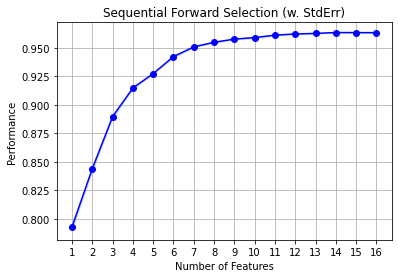

In [ ]:
fig2 = plot_sfs(sbss.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
list_fss = list(sbss.k_feature_names_)

for i in X_train.columns:
  if i not in list_fss:
    print(i)

Gender
Flight Distance
Departure/Arrival time convenient
Food and drink
On-board service
Departure Delay in Minutes


In [ ]:
feat_cols1 = list(sbss.k_feature_idx_)
print(feat_cols1)

[1, 2, 3, 4, 6, 8, 9, 11, 12, 13, 15, 16, 17, 18, 19, 21]


In [ ]:
# Build full model with selected features
from sklearn.metrics import accuracy_score as acc
clf_smote = lgb.LGBMClassifier()
clf_smote.fit(X_train_smote.iloc[:, feat_cols1], y_train_smote)

y_train_pred_smote = clf_smote.predict(X_train_smote.iloc[:, feat_cols1])
print('Training accuracy on selected features: %.3f' % acc(y_train_smote, y_train_pred_smote))

y_train_pred_smote = clf_smote.predict(X_val_smote.iloc[:, feat_cols1])
print('Testing accuracy on selected features: %.3f' % acc(y_val_smote, y_train_pred_smote))



Training accuracy on selected features: 0.966
Testing accuracy on selected features: 0.962


In [ ]:
# Build full model on ALL features, for comparison
clf_smote = lgb.LGBMClassifier()
clf_smote.fit(X_train_smote, y_train_smote)

y_train_pred_smote = clf_smote.predict(X_train_smote)
print('Training accuracy on all features: %.3f' % acc(y_train_smote, y_train_pred_smote))

y_train_pred_smote = clf_smote.predict(X_val_smote)
print('Testing accuracy on all features: %.3f' % acc(y_val_smote, y_train_pred_smote))

Training accuracy on all features: 0.967
Testing accuracy on all features: 0.963


In [ ]:
# cross validation score on val set using all features

kfold = StratifiedKFold(n_splits=5)

random_state = 42
models = []

models.append(clf_smote)


cv_results = []
for model in models :
    cv_results.append(cross_val_score(model, X_val_smote, y = y_val_smote, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LightGBM"]})

cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.959918,0.002633,LightGBM


In [ ]:
# cross validation score on val set using selected features

kfold = StratifiedKFold(n_splits=5)

random_state = 42
models = []

models.append(clf_smote)


cv_results = []
for model in models :
    cv_results.append(cross_val_score(model, X_val_smote.iloc[:, feat_cols1], y = y_val_smote, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LightGBM"]})

cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.958673,0.002281,LightGBM


## Hyperparameter Tuning

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth' : [11,14,18,20,22,24,26,28,30],
    'num_leaves' : [80,90,100,110,120]
    }


lgb_clf_gridcv = GridSearchCV(clf_smote, parameters, cv=5, scoring='accuracy')
lgb_clf_gridcv.fit(X_val_smote.iloc[:, feat_cols], y_val_smote)

CPU times: user 6min 38s, sys: 11.3 s, total: 6min 50s
Wall time: 3min 44s


In [ ]:
# the results
cv_result = pd.DataFrame(lgb_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
40,"{'max_depth': 30, 'num_leaves': 80}",0.960513,1
37,"{'max_depth': 28, 'num_leaves': 100}",0.960428,2
35,"{'max_depth': 28, 'num_leaves': 80}",0.960371,3
20,"{'max_depth': 22, 'num_leaves': 80}",0.960371,4
19,"{'max_depth': 20, 'num_leaves': 120}",0.960201,5
36,"{'max_depth': 28, 'num_leaves': 90}",0.960145,6
30,"{'max_depth': 26, 'num_leaves': 80}",0.960060,7
26,"{'max_depth': 24, 'num_leaves': 90}",0.960003,8
34,"{'max_depth': 26, 'num_leaves': 120}",0.959975,9
25,"{'max_depth': 24, 'num_leaves': 80}",0.959918,10


In [ ]:
lgb_clf_gridcv.best_estimator_

LGBMClassifier(max_depth=30, num_leaves=80)

## Prediction on Test Data

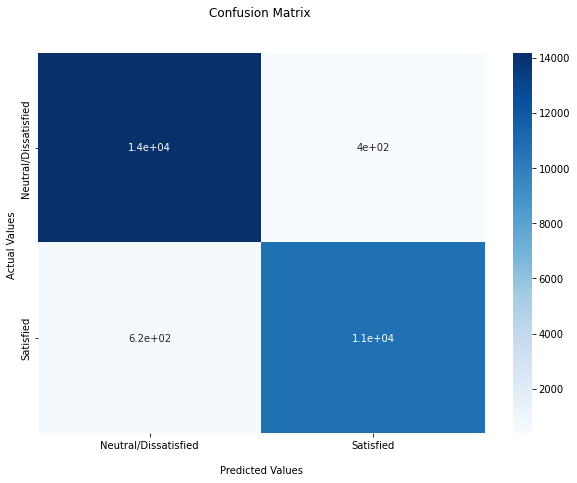

In [ ]:
#make a prediction on test set
y_pred = lgb_clf_gridcv.best_estimator_.predict(X_test.iloc[:, feat_cols])

#show the confusion matrix
fig, ax = plt.subplots(figsize=(10,7))

cf_matrix = confusion_matrix(y_test, y_pred, labels=lgb_clf_gridcv.best_estimator_.classes_)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
#title and label
ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
#ticklabels
ax.xaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])
ax.yaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])
plt.show()

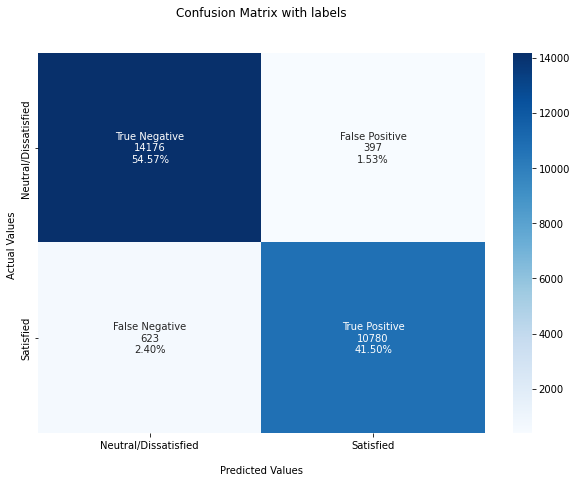

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
#title and label
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
#ticklabels
ax.xaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])
ax.yaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     14573
         1.0       0.96      0.95      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## SHAP values

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


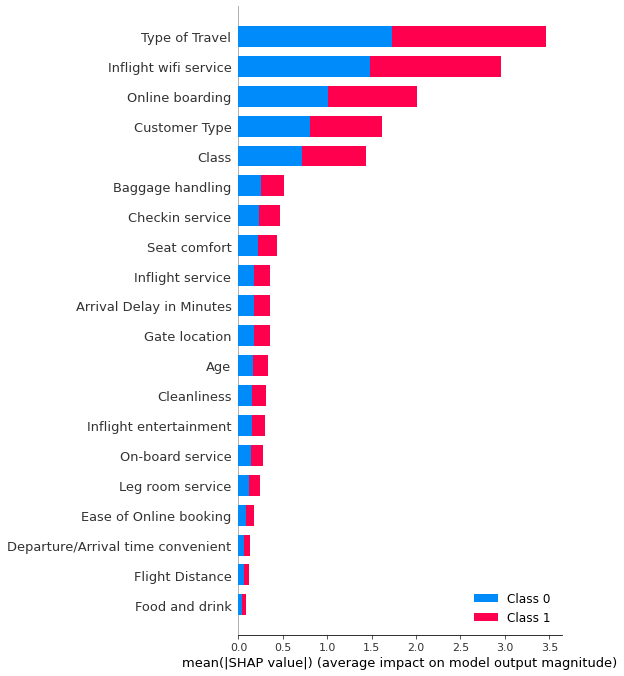

In [ ]:
import shap

shap_values = shap.TreeExplainer(clf_smote).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

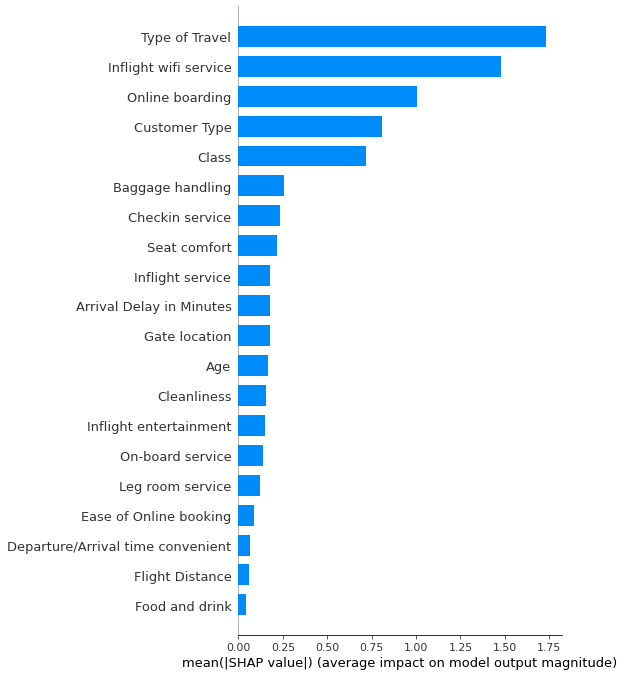

In [ ]:
import shap

shap_values = shap.TreeExplainer(clf_smote).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)

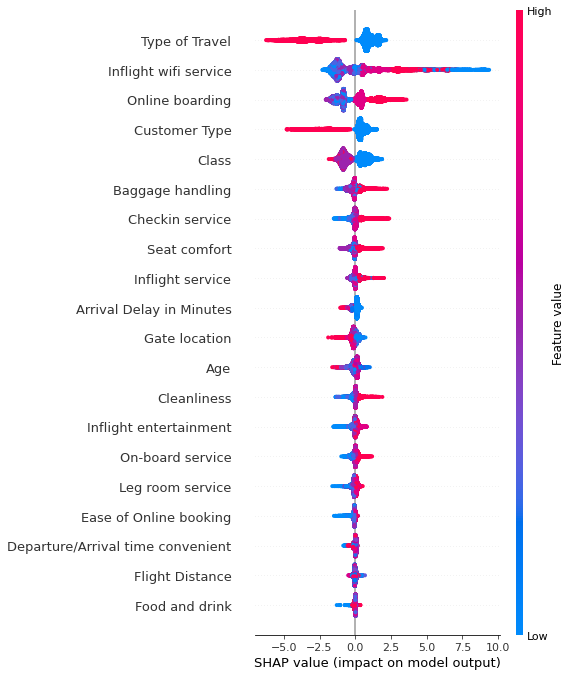

In [ ]:
shap.summary_plot(shap_values[1], X_test)